In [71]:
from deepmol.loaders import CSVLoader
from deepmol.splitters import MultiTaskStratifiedSplitter

loader = CSVLoader("../final_dataset_top_v2.csv", smiles_field="smiles", labels_fields=['C00073', 'C00078', 'C00079', 'C00082', 'C00235', 'C00341', 'C00353',
       'C00448', 'C01789', 'C03506', 'C00047', 'C00108', 'C00187', 'C00148',
       'C00041', 'C00129', 'C00062', 'C01852', 'C00049', 'C00135', 'C00223',
       'C00509', 'C00540', 'C01477', 'C05903', 'C05904', 'C05905', 'C05908',
       'C09762'], id_field = 'ids')

dataset = loader.create_dataset()

2023-08-22 12:24:10,739 — INFO — Assuming multitask since y has more than one dimension. If otherwise, explicitly set the mode to 'classification' or 'regression'!


In [72]:
splitter = MultiTaskStratifiedSplitter()
train, valid, test = splitter.train_valid_test_split(dataset, frac_train=0.7, frac_valid=0.2, frac_test=0.1)

In [73]:
train.to_csv("train.csv")
valid.to_csv("valid.csv")
test.to_csv("test.csv")

In [74]:
import pandas as pd

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
valid = pd.read_csv("valid.csv")

total = pd.concat([train, test, valid]).shape[0]

In [75]:
print(train.shape[0] / total)
print(valid.shape[0] / total)
print(test.shape[0] / total)

0.6848739495798319
0.20728291316526612
0.10784313725490197


In [80]:
import numpy as np

y_test_sum = np.sum(test.iloc[:, 2:])
y_train_sum = np.sum(train.iloc[:, 2:])
y_validation_sum = np.sum(valid.iloc[:, 2:])

sum_of_all = pd.DataFrame([y_train_sum, y_validation_sum, y_test_sum], index=["train", "validation", "test"])

In [81]:
sum_of_all.loc['Validation relative split', :] = sum_of_all.loc['validation', :] / (sum_of_all.loc['train', :] + sum_of_all.loc['test', :] + sum_of_all.loc['validation', :]) * 100

sum_of_all.loc['Test relative split', :] = sum_of_all.loc['test', :] / (sum_of_all.loc['train', :] + sum_of_all.loc['test', :] + sum_of_all.loc['validation', :]) * 100
sum_of_all.loc['Train relative split', :] = sum_of_all.loc['train', :] / (sum_of_all.loc['train', :] + sum_of_all.loc['test', :]+ sum_of_all.loc['validation', :]) * 100

In [82]:
sum_of_all

,C00073,C00078,C00079,C00082,C00235,C00341,C00353,C00448,C01789,C03506,...,C00135,C00223,C00509,C00540,C01477,C05903,C05904,C05905,C05908,C09762
train,28.0,142.00000,202.000000,137.000000,22.000000,41.000000,190.000000,68.000000,19.000000,25.000000,...,13.000000,57.000000,7.000000,14.0,13.000000,21.000000,7.000000,9.000000,9.000000,34.000000
validation,8.0,40.00000,75.000000,39.000000,6.000000,12.000000,54.000000,20.000000,6.000000,5.000000,...,4.000000,2.000000,5.000000,7.0,3.000000,6.000000,8.000000,11.000000,13.000000,5.000000
test,4.0,20.00000,53.000000,20.000000,3.000000,6.000000,27.000000,10.000000,3.000000,3.000000,...,2.000000,3.000000,2.000000,14.0,1.000000,2.000000,2.000000,2.000000,2.000000,9.000000
Validation relative split,20.0,19.80198,22.727273,19.897959,19.354839,20.338983,19.926199,20.408163,21.428571,15.151515,...,21.052632,3.225806,35.714286,20.0,17.647059,20.689655,47.058824,50.000000,54.166667,10.416667
Test relative split,10.0,9.90099,16.060606,10.204082,9.677419,10.169492,9.963100,10.204082,10.714286,9.090909,...,10.526316,4.838710,14.285714,40.0,5.882353,6.896552,11.764706,9.090909,8.333333,18.750000
Train relative split,70.0,70.29703,61.212121,69.897959,70.967742,69.491525,70.110701,69.387755,67.857143,75.757576,...,68.421053,91.935484,50.000000,40.0,76.470588,72.413793,41.176471,40.909091,37.500000,70.833333


In [79]:
for column in sum_of_all.columns:
       validation_split = sum_of_all.loc['Validation relative split', column]
       test_split = sum_of_all.loc['Test relative split', column]
       
       if validation_split == 0 and test_split == 0:
              
              train_column_rows = train[train[column] == 1]
              add_to_validation = train_column_rows.sample(frac = 0.2)
              valid = pd.concat([valid, add_to_validation])
              train.drop(add_to_validation.index, inplace=True)
              
              train_column_rows = train[train[column] == 1]
              add_to_test = train_column_rows.sample(frac = 0.1)
              train.drop(add_to_test.index, inplace=True)
              test = pd.concat([test, add_to_test])
              
       
       elif test_split == 0:
              train_column_rows = train[train[column] == 1]
              add_to_test = train_column_rows.sample(frac = 0.2)
              test = pd.concat([test, add_to_test])
              train.drop(add_to_test.index, inplace=True)
              
        

In [83]:
df = pd.melt(sum_of_all.T.reset_index(), id_vars=['index']).rename(columns={'index': 'Precursor', 'value': 'Percentage of data'})
df = df[(df["variable"]!="train") & (df["variable"]!="validation") & (df["variable"]!="test")]

In [84]:
df1 = sum_of_all.loc['Test relative split', :].describe()
df2 = sum_of_all.loc['Train relative split', :].describe()
df3 = sum_of_all.loc['Validation relative split', :].describe()
df_all = pd.concat([df1, df2, df3], axis=1)
df_all.drop(['count'], inplace=True)
table_styled = df_all.style.background_gradient(cmap="YlGn")

table_styled.to_html("split_result.html")

In [69]:
table_styled

,Test relative split,Train relative split,Validation relative split
mean,9.806862,68.528856,21.664282
std,10.836727,16.018650,12.483396
min,0.000000,23.076923,0.000000
25%,3.225806,67.857143,18.518519
50%,9.803922,70.000000,19.926199
75%,10.204082,70.833333,21.052632
max,50.000000,100.000000,54.166667


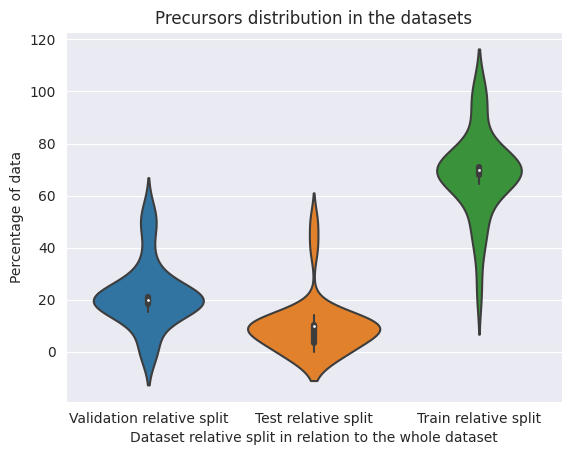

In [70]:
import seaborn as sns
from matplotlib import pyplot as plt

sns.violinplot(data=df, x = "variable", y = "Percentage of data")
#add title and axis names
plt.title('Precursors distribution in the datasets')
# write x and y labels titles
plt.xlabel('Dataset relative split in relation to the whole dataset')
plt.ylabel('Percentage of data')
plt.savefig("split_result.png")

In [85]:
train.to_csv("train.csv", index=False)
valid.to_csv("valid.csv", index=False)
test.to_csv("test.csv", index=False)